# Call libraries

In [115]:
#Load Dataset & Visualize
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

#Handling Outliers
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA

#Applying SVM model
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer,make_column_selector,make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# First: Load Dataset

In [116]:
data = pd.read_csv(r'C:\Users\HELLo\Documents\bank-additional-full.csv',sep=';')

In [117]:
# Display the first five rows of the dataset and its shape
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [118]:
# Display its shape
data.shape

(41188, 21)

#### This meets the project requirement of having more than 10,000 records and at least 20 features.

# Second: Exploratory Data Analysis (EDA)

## Descriptive statistics of the dataset

In [119]:
descriptive_stats = data.describe()
descriptive_stats

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


### The dataset has a mixture of numerical and categorical variables. For example:
#### Numerical: Age, Campaign, Pdays, Previous, Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed
#### Categorical: Job, Marital, Education, Default, Housing, Loan, Contact, Month, Day_of_week, Poutcome
### Y (target variable)

## Check for missing values and data types

In [120]:
missing_values = data.isnull().sum()
missing_values

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

### Missing Values: There are no missing values in the dataset, as each column has a complete set of entries.

## Check data types

In [121]:
data_types = data.dtypes
data_types

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

# Data Types:

   ### Numerical features are either int64 or float64.
   ### Categorical features are of type object.

## Some Visualizations for better understanding the dataset

### Plotting histograms and boxplots for numerical features

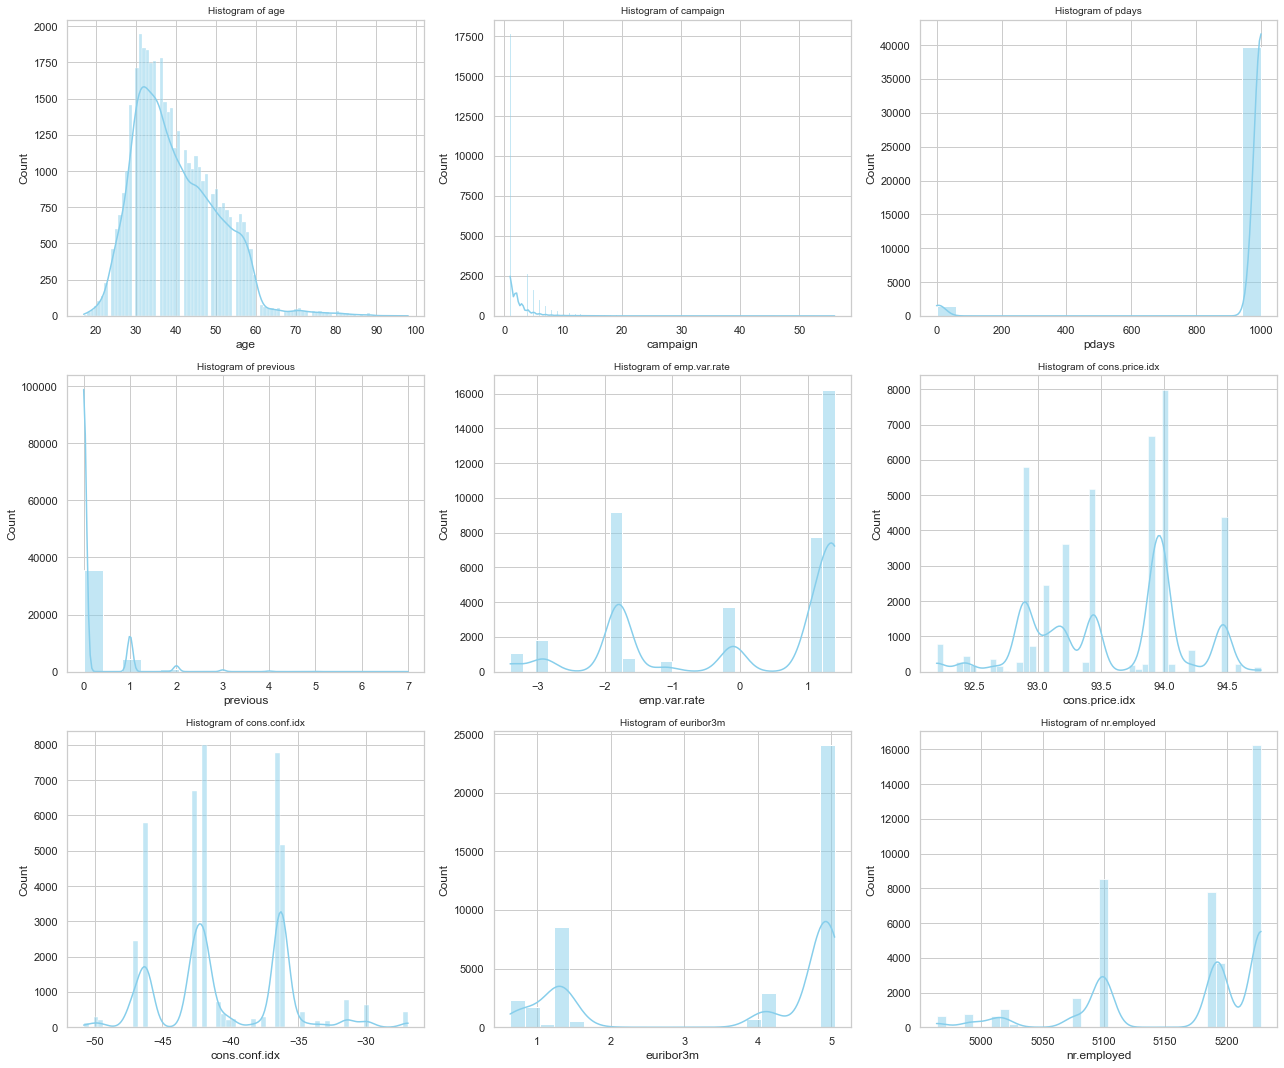

In [122]:
# Setting up the aesthetic style for the plots
sns.set(style="whitegrid")

# Creating a figure to hold the visualizations
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

# Numerical columns for histograms and box plots
numerical_columns = ['age', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Plotting histograms and boxplots for numerical features
for i, col in enumerate(numerical_columns):
    row = i // 3
    col_pos = i % 3
    sns.histplot(data[col], ax=axes[row, col_pos], kde=True, color='skyblue')
    axes[row, col_pos].set_title(f'Histogram of {col}', fontsize=10)
  

plt.tight_layout()
plt.show()

# Conclusion
   ### Age:
    Most clients are between 30 and 40 years old.
   ### Campaign, Pdays, Previous:
    Skewed distributions, suggesting most values cluster around lower numbers.
   ### Emp.var.rate, Cons.price.idx, Cons.conf.idx, Euribor3m, Nr.employed:
    show peaks which might correspond to specific economic conditions or policies at the time the data was collected.

### Creating boxplots in a new figure to check for outliers

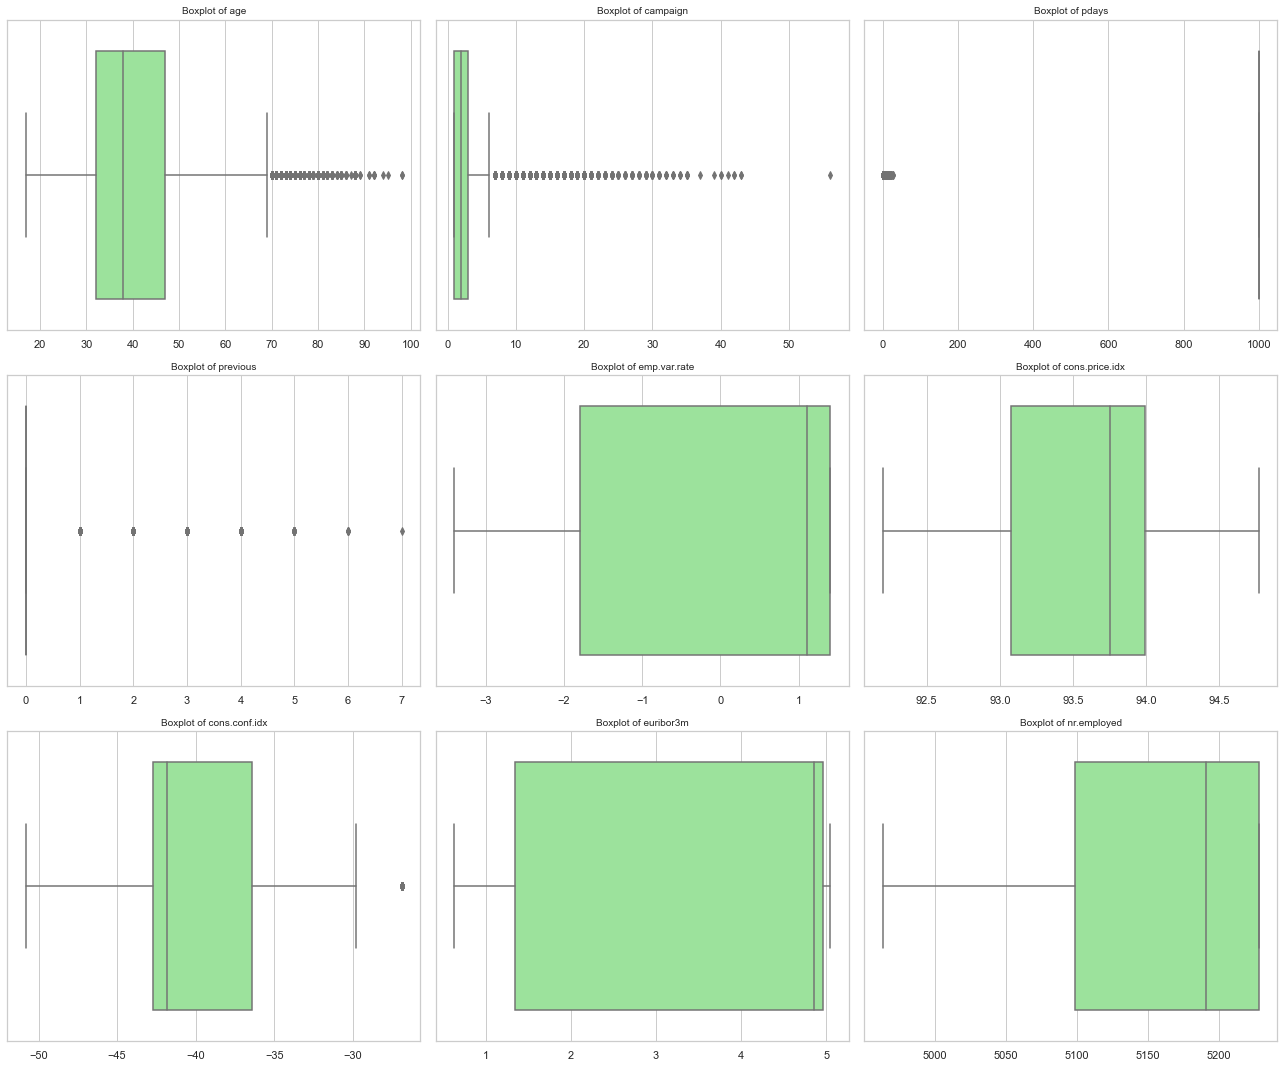

In [123]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
for i, col in enumerate(numerical_columns):
    row = i // 3
    col_pos = i % 3
    sns.boxplot(x=data[col], ax=axes[row, col_pos], color='lightgreen')
    axes[row, col_pos].set_title(f'Boxplot of {col}', fontsize=10)
    axes[row, col_pos].set_xlabel('')
    axes[row, col_pos].set_ylabel('')

plt.tight_layout()
plt.show()

# Conclusion
   ### Pdays:
       Has distinct behavior with most data points at'999', indicating that many clients were not previously contacted.
   ### Previous:
       Shows many outliers, indicating contacts from previous campaigns were typically zero but with some exceptions.
   ### Campaign:
      Some outliers are present, indicating a few clients were contacted many times during the campaign.

## Correlation Matrix for numerical features to identify any significant relationships.

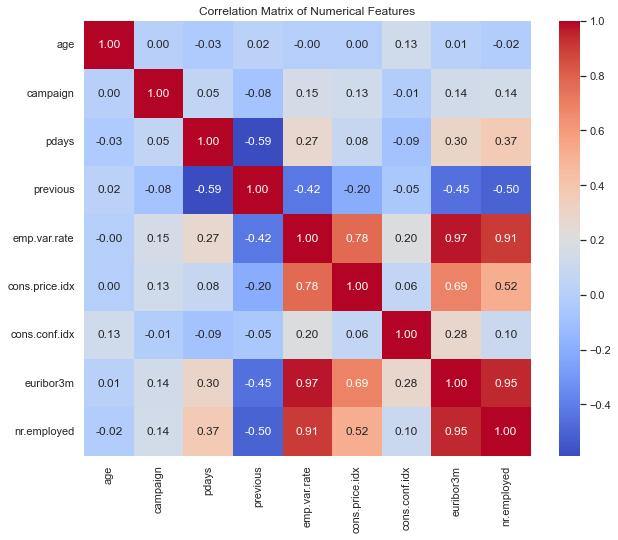

In [124]:
# Creating a correlation matrix for numerical features
correlation_matrix = data[numerical_columns].corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# The correlation matrix for the numerical features shows:
    Some features, like euribor3m, nr.employed, emp.var.rate, and cons.price.idx, show moderate to strong correlations
    with each other, suggesting possible multicollinearity.
    
    Features like pdays and previous have negative correlations with euribor3m and emp.var.rate,
    indicating that as economic conditions vary, the contact patterns with clients change.

## Bar charts for categorical features to understand their distributions.

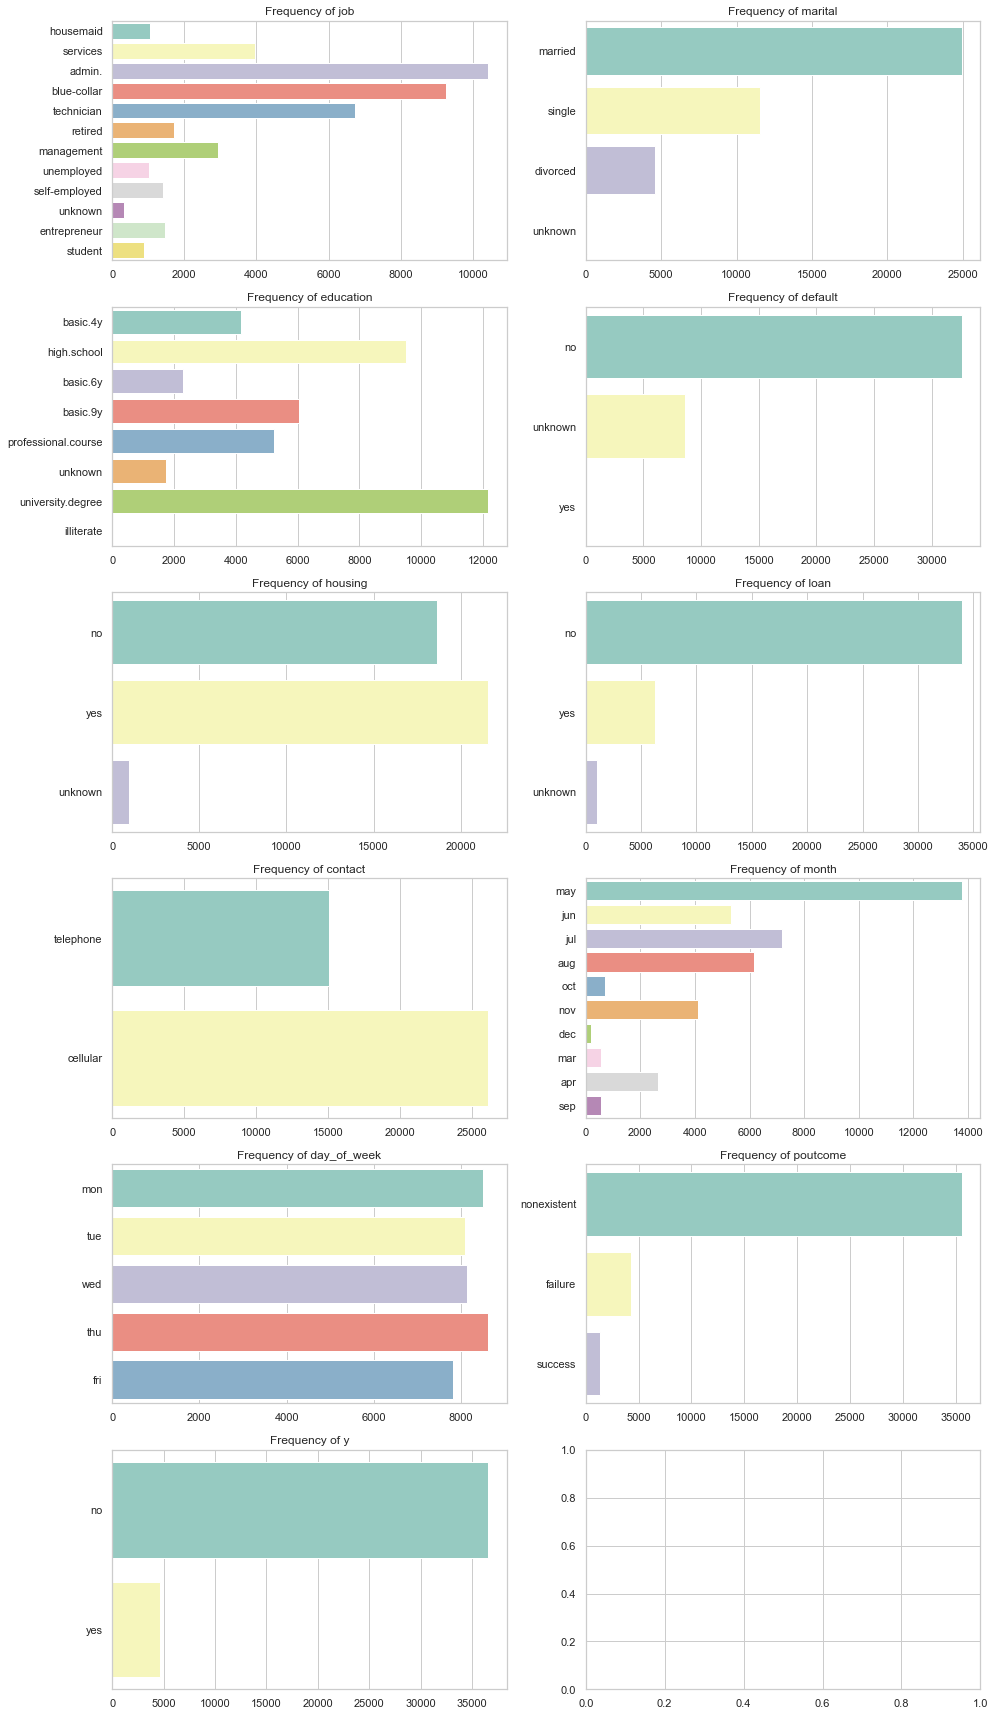

In [125]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']

fig, axes = plt.subplots(6, 2, figsize=(14, 24))
for i, col in enumerate(categorical_columns):
    row = i // 2
    col_pos = i % 2
    sns.countplot(y=data[col], ax=axes[row, col_pos], palette='Set3')
    axes[row, col_pos].set_title(f'Frequency of {col}', fontsize=12)
    axes[row, col_pos].set_xlabel('')
    axes[row, col_pos].set_ylabel('')

plt.tight_layout()
plt.show()

## The bar charts provide insights into the frequency distribution of categorical features:

    Job: 'admin.' is the most common job type.
    
    Marital: Most clients are married.
    
    Education: 'university.degree' is the most frequent education level.
    
    Default, Housing, Loan: These features show the status of clients regarding credit default, housing loans,
    and personal loans.
    
    Contact: Most contacts are made via cellular phones.
    
    Month, Day_of_week: 'may' is the most common month for contacts, and contacts are fairly evenly spread across the week.
    
    Poutcome: Most outcomes from previous marketing campaigns are 'nonexistent', indicating no prior contact.
    
    Y (Target Variable): Most clients have not subscribed to the term deposit (indicated by 'no').

# Third: Data Cleaning.

   ### Data Cleaning: Address any outliers or incorrect entries identified during the EDA.
   ### Dimensionality Reduction: Given the potential multicollinearity, apply techniques like PCA to reduce the number of features but retain meaningful information.

### Outliers
    'campaign', 'pdays', and 'previous': These features have significant outliers
                                          which could affect the model's performance.
    
    'Pdays' values: The majority of 'pdays' values are '999',
                    indicating that most clients were not contacted before.
                    This can be treated as a separate category or transformed.
    
    Standardizing Numerical Data: Since SVM is sensitive to the scale of the data,
                                  standardizing the numerical features can be beneficial.

# 1. Handling Outliers
### For 'campaign' and 'previous', we can cap the values at a certain percentile to mitigate the effect of extreme outliers.

In [126]:
# Count the total outliers for each variable
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

max_value = Q3 + 1.5 * IQR
min_value = Q1 - 1.5 * IQR

# Marking the outliers in the DataFrame
outliers_mask = ((data[data.columns] < min_value) | (data[data.columns] > max_value))

# Removing outliers from the DataFrame
data_no_outliers = data[~outliers_mask.any(axis=1)]

# Counting the total number of outliers
total_outliers = (outliers_mask.sum())
print("Total outliers for each variable:")
print(total_outliers)
print("Total outliers:", total_outliers.sum())

Total outliers for each variable:
age                469
campaign          2406
cons.conf.idx      447
cons.price.idx       0
contact              0
day_of_week          0
default              0
duration          2963
education            0
emp.var.rate         0
euribor3m            0
housing              0
job                  0
loan                 0
marital              0
month                0
nr.employed          0
pdays             1515
poutcome             0
previous          5625
y                    0
dtype: int64
Total outliers: 13425


C:\Users\HELLo\AppData\Local\Temp\ipykernel_16604\1138757500.py:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = ((data[data.columns] < min_value) | (data[data.columns] > max_value))


In [127]:
data.shape[0]

41188

In [128]:
# Handling outliers by capping
# Define percentiles for capping
cap_percentile = 95
campaign_cap = data['campaign'].quantile(cap_percentile / 100)
previous_cap = data['previous'].quantile(cap_percentile / 100)

# Cap the outliers
data['campaign'] = data['campaign'].clip(upper=campaign_cap)
data['previous'] = data['previous'].clip(upper=previous_cap)

<AxesSubplot:>

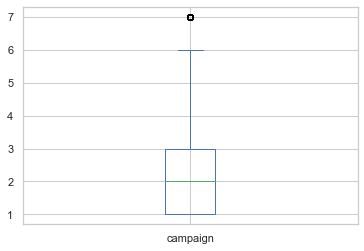

In [129]:
data['campaign'].plot.box()

# 2. Transforming 'pdays'
### We'll create a new binary feature indicating whether a client was previously contacted (0) or not (999).

In [130]:
# Transform 'pdays'
data['contacted_before'] = data['pdays'].apply(lambda x: 0 if x == 999 else 1)
data.drop('pdays', axis=1, inplace=True)

# 3. Standardizing Data
### We will standardize all numerical features to have zero mean and unit variance.

In [113]:
# Standardizing numerical data
numerical_columns = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## check the updates

In [114]:
# Check the first few rows of the transformed data to verify changes
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted_before
0,1.533034,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,-0.783956,-0.397706,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,0
1,1.628993,services,married,high.school,unknown,no,no,telephone,may,mon,...,-0.783956,-0.397706,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,0
2,-0.290186,services,married,high.school,no,yes,no,telephone,may,mon,...,-0.783956,-0.397706,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,0
3,-0.002309,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,-0.783956,-0.397706,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,0
4,1.533034,services,married,high.school,no,no,yes,telephone,may,mon,...,-0.783956,-0.397706,nonexistent,0.648092,0.722722,0.886447,0.71246,0.33168,no,0


# conclusion
    Handling Outliers: Values for 'campaign' and 'previous' were capped at the 95th percentile to reduce
                       the impact of extreme outliers.
    
    Transforming 'pdays': A new binary feature 'contacted_before' was added to indicate whetherthe client
                          was contacted before (0 if not, 1 if yes).
                          The original 'pdays' feature was removed as it's now redundant.
    
    Standardizing Data: Numerical features were standardized to have zero mean and unit variance,
                        which is important for the performance of the SVM model.

# Fourth: Dimensionality Reduction

In [96]:
# Selecting only numerical columns for PCA (excluding the newly added binary 'contacted_before')
numerical_columns_for_pca = ['age', 'campaign', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']

# Setting up PCA to explain 95% of the variance
pca = PCA(n_components=0.95)
principal_components = pca.fit_transform(data[numerical_columns_for_pca])

#Checking how many components PCA chose
number_of_components = pca.n_components_
explained_variance = pca.explained_variance_ratio_

number_of_components, explained_variance

(6,
 array([0.47373023, 0.14130843, 0.12198273, 0.10641435, 0.09254625,
        0.05955672]))

## The PCA analysis results are as follows:

   #### Number of Components: 5 principal components were selected to explain 95% of the variance in the dataset.
   
   

### Interpretation:

    This reduction from 8 original numerical features to 6 principal components helps in simplifying the dataset while 
    retaining most of the information. This is beneficial for model training as it may help to avoid overfitting
    and can reduce computational costs.

In [131]:
data_x=data.drop('y',axis=1)
y = data['y'].apply(lambda x: 1 if x == 'yes' else 0)

In [132]:
num_pipline=Pipeline([('standard',StandardScaler()),
                      ('pca',PCA(n_components=0.95))])

In [135]:
cat_pipline=Pipeline([('imputer',SimpleImputer(strategy="median")),('onehotencoder',OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
data_x.d

In [143]:
preprocessing=make_column_transformer([(num_pipline,make_column_selector(dtype_include=np.number))
                                      ,(cat_pipline,make_column_selector(dtype_include=object))
                                      ,('passthrough', ['contacted_before']) ])

In [142]:
data_prepro=preprocessing.fit_transform(data_x)

TypeError: All estimators should implement fit and transform, or can be 'drop' or 'passthrough' specifiers. '(Pipeline(steps=[('standard', StandardScaler()),
                ('pca', PCA(n_components=0.95))]), <sklearn.compose._column_transformer.make_column_selector object at 0x000001D595BE5F70>)' (type <class 'tuple'>) doesn't.

# Fifth: SVM Model Development

In [18]:
# Target variable preparation
data_prepro=preprocessing.fit_transform(date_x)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data_prepro, y, test_size=0.2, random_state=42)

# Creating a pipeline for SVM
# Including PCA in the pipeline to ensure PCA is fitted only on training data
pipeline = Pipeline([
    ('pca', PCA(n_components=6)),
    ('svm', SVC(kernel='linear', C=1, random_state=42))
])

# Training the SVM model
pipeline.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Displaying the results in a more readable format
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_rep)

Accuracy: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      7303
           1       0.00      0.00      0.00       935

    accuracy                           0.89      8238
   macro avg       0.44      0.50      0.47      8238
weighted avg       0.79      0.89      0.83      8238



## The SVM model has been trained and evaluated with the following results:

### Accuracy: 88.65%
   #### Class 1 (yes):
        Precision: 0.0 (No correct predictions for positive instances)
        Recall: 0.0 (Missed all positive instances)
        F1-score: 0.0 (Poor performance on the positive class)
   #### Class 0 (no):
        Precision, Recall, and F1-score are close to 1 (Good performance for the negative class)

## Observations:

   #### The model is accurate mainly because it's good at predicting the majority class ('no').
   #### It struggles with predicting the minority class ('yes') due to class imbalance, where 'no' instances significantly outnumber 'yes' instances.

## So, we should do the following

#### 1- Balancing the dataset: Consider methods like SMOTE
                            oversampling the minority class to balance the classes.
#### 2- Parameter Tuning: Experiment with different values of C and try different kernels like RBF
                        to see if they yield better results for the minority class.
#### 3- Evaluation Metrics: In addition to accuracy, consider using balanced accuracy or AUC-ROC as metrics
                         As they give a better picture in imbalanced datasets.

In [19]:
# Assuming X_train, y_train, X_test, y_test are already defined

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Creating a new SVM pipeline with RBF kernel
pipeline_rbf = Pipeline([
    ('pca', PCA(n_components=6)),
    ('svm', SVC(kernel='rbf', C=1, random_state=42))
])

# Training the new SVM model on the balanced dataset
pipeline_rbf.fit(X_train_smote, y_train_smote)

# Predicting and evaluating the new model
y_pred_smote = pipeline_rbf.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
classification_rep_smote = classification_report(y_test, y_pred_smote)
roc_auc_score_smote = roc_auc_score(y_test, y_pred_smote)

# Displaying the results
print(f"Accuracy (SMOTE): {accuracy_smote:.2f}")
print("Classification Report (SMOTE):\n", classification_rep_smote)
print(f"ROC AUC Score (SMOTE): {roc_auc_score_smote:.2f}")

Accuracy (SMOTE): 0.84
Classification Report (SMOTE):
               precision    recall  f1-score   support

           0       0.94      0.87      0.91      7303
           1       0.37      0.57      0.45       935

    accuracy                           0.84      8238
   macro avg       0.65      0.72      0.68      8238
weighted avg       0.88      0.84      0.85      8238

ROC AUC Score (SMOTE): 0.72


In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {'svm__C': [0.1, 1, 10, 100],
              'svm__gamma': [0.01, 0.1, 1, 10]}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline_rbf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train_smote, y_train_smote)

# Get the best hyperparameters and retrain the model
best_params = grid_search.best_params_
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train_smote, y_train_smote)

# Evaluate the model with the best hyperparameters
y_pred_best = best_svm_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)
roc_auc_score_best = roc_auc_score(y_test, y_pred_best)

# Print the accuracy score
print(f"Accuracy (Best Model): {accuracy_best:.2f}")

# Print the classification report
print("Classification Report (Best Model):")
print(classification_rep_best)

# Print the ROC AUC score
print(f"ROC AUC Score (Best Model): {roc_auc_score_best:.2f}")

## Applying Cross Validation
### to ensure that the model generalizes well over different subsets of your dataset.